<a href="https://colab.research.google.com/github/so-dipe/working/blob/main/time%20series%20for....ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ok....

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import libraries

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/so-dipe/working/main/ExportSales.csv')
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460


In [3]:
df.shape

(7811, 9)

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,ID,Date,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
0,2529604,2019-04-28,Category5,267,30011006,612,IRQ,750,3334.8225
1,2529605,2019-04-29,Category5,302,30011006,514,BHR,400,3032.8240
2,2529606,2019-05-13,Category5,507,30011006,513,BHR,100,749.9520
3,2529607,2019-06-01,Category5,795,30011006,5,SYC,100,556.8170
4,2529608,2019-07-03,Category5,1184,30011006,560,AFG,20,39.4460


In [22]:
df.set_index('Date', inplace=True)
df.head()

,ID,Category,Invoice Number,Product Code,Customer Code,Destenation,QTY,Total Price
Date,,,,,,,,
2019-04-28,2529604,Category5,267,30011006,612,IRQ,750,3334.8225
2019-04-29,2529605,Category5,302,30011006,514,BHR,400,3032.8240
2019-05-13,2529606,Category5,507,30011006,513,BHR,100,749.9520
2019-06-01,2529607,Category5,795,30011006,5,SYC,100,556.8170
2019-07-03,2529608,Category5,1184,30011006,560,AFG,20,39.4460


In [23]:
df.drop(columns=['ID', 'Invoice Number', 'Product Code', 'Customer Code', 'Destenation', 'Category'], inplace=True)
df.head()

,QTY,Total Price
Date,,
2019-04-28,750,3334.8225
2019-04-29,400,3032.8240
2019-05-13,100,749.9520
2019-06-01,100,556.8170
2019-07-03,20,39.4460


In [28]:
weekly_df = df.resample('1W').sum().fillna(method='ffill')
weekly_df.head()

,QTY,Total Price
Date,,
2019-04-07,455,11196.14650
2019-04-14,2100,5354.62200
2019-04-21,1700,5554.56300
2019-04-28,7450,33988.10050
2019-05-05,9595,49606.51738


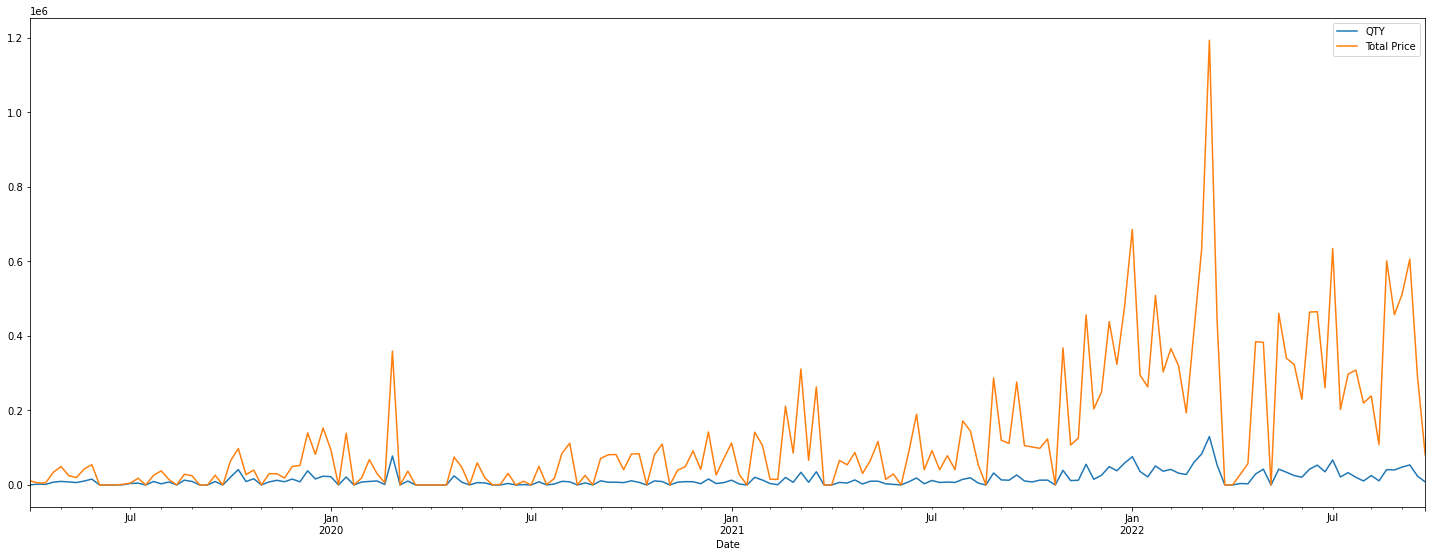

In [29]:
fig, ax = plt.subplots(figsize=(25, 9))
weekly_df.plot(kind='line', ax=ax);

Up to this point, all I have done is clean the data and get it ready for time series analysis. 

I am going to skip much of (2) and (3) because I don't have the time to do high level EDA. I would just be focusing on Autocorrelation and Partial Autocorrelation. You could explore Moving averages and so on. I might also have to do a seasonality and trend decomposition later on.

Its worth noting that I am using the data on an aggregated weekly period and my focus is on Price.

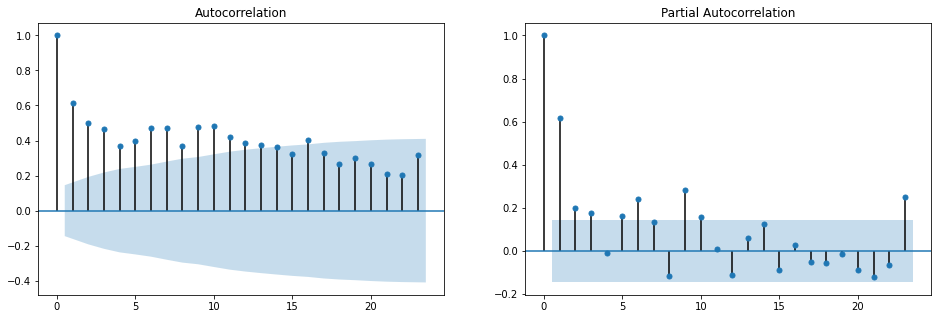

In [31]:
y = weekly_df['Total Price']
fig, ax = plt.subplots(figsize=(16, 5), nrows=1, ncols=2)
plot_acf(y, ax[0])
plot_pacf(y, ax=ax[1]);

This plot would give us good values for p and q in the ARMA or ARIMA model.

remember that ARMA stands for Auto Regression Moving Average and ARIMA just has an Integrated. ARMA has two important hyperparamters (p and q), ARIMA includes a third hyperparameter (d). d is determined based on the stationarity of the time series.